# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = '../data/train.p'
validation_file= '../data/valid.p'
testing_file = '../data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

In [2]:
import numpy as np

n_train = len(y_train)
n_validation = len(y_valid)
n_test = len(y_test)
image_shape = X_train.shape[1:]
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

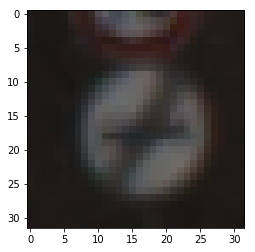

In [4]:
plt.imshow(X_train[0])

In [5]:
import csv
sign_names_dict = {}
with open('signnames.csv', newline='') as csvfile:
    signnames = csv.reader(csvfile)
    next(signnames, None) # skip header
    for row in signnames:
        sign_names_dict[row[0]] = row[1]

<Container object of 43 artists>

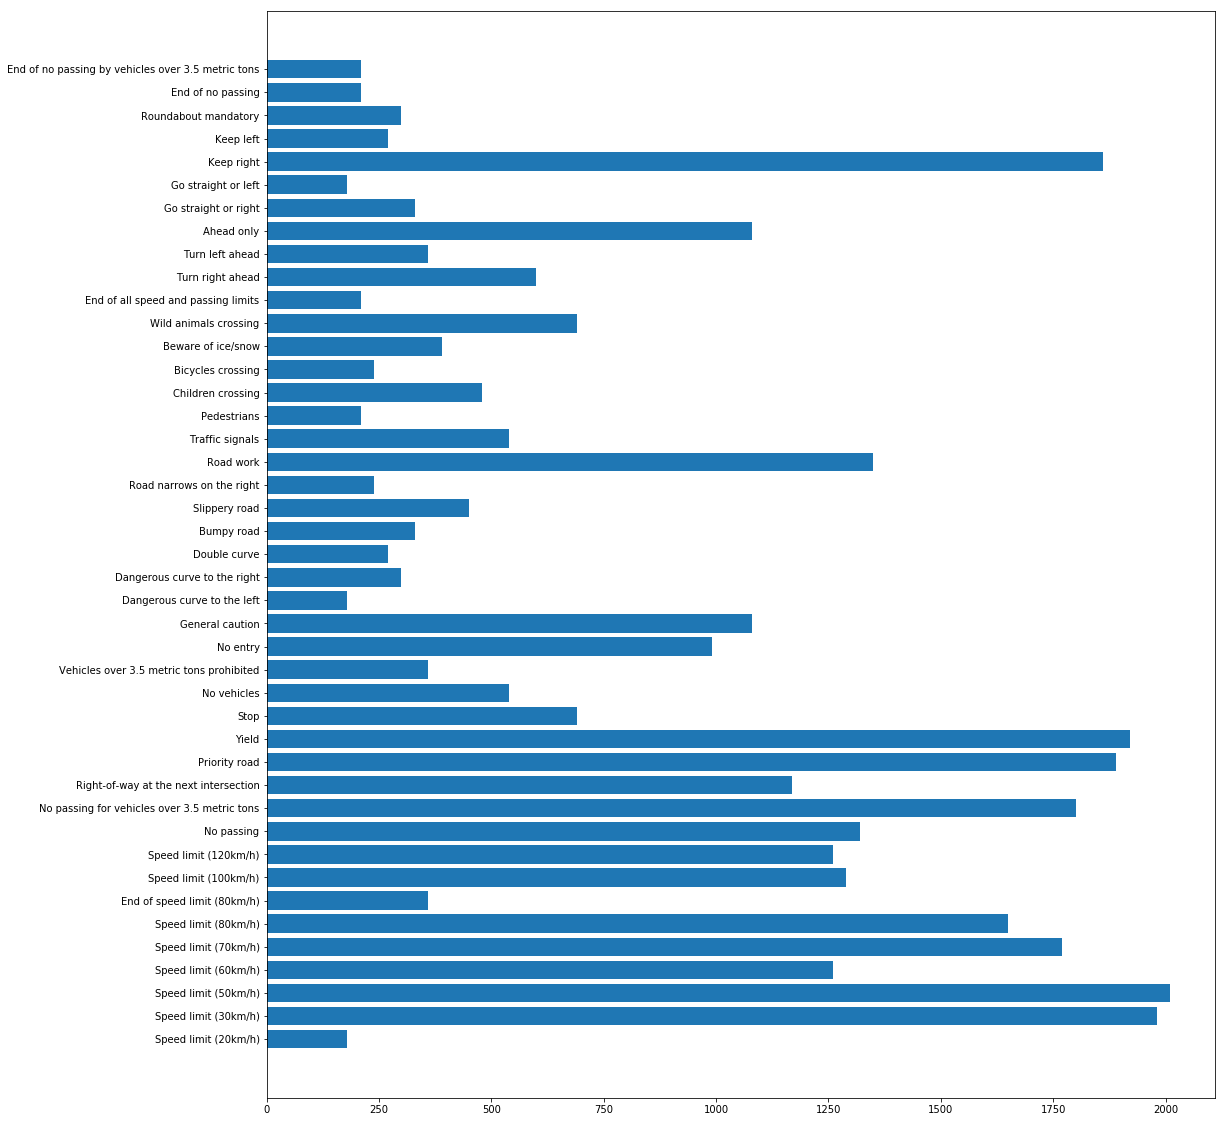

In [6]:
category_ids, frecuency = np.unique(y_train, return_counts=True)
categories = [sign_names_dict[str(category)] for category in category_ids]

plt.figure(figsize=(17, 20))
plt.yticks(category_ids, categories)
plt.barh(category_ids, frecuency)

#### Shuffle

In [7]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=20)

#### Show samples of every class

In [8]:
MAX_AMOUNT_OF_SAMPLES = 10

samples_dict = {}
count_dict = {}
for x, y in zip(X_train, y_train):
    count = count_dict.get(y, 0)
    if count < MAX_AMOUNT_OF_SAMPLES:
        count_dict[y] = count + 1
        samples = samples_dict.get(y, [])
        samples.append(x)
        samples_dict[y] = samples


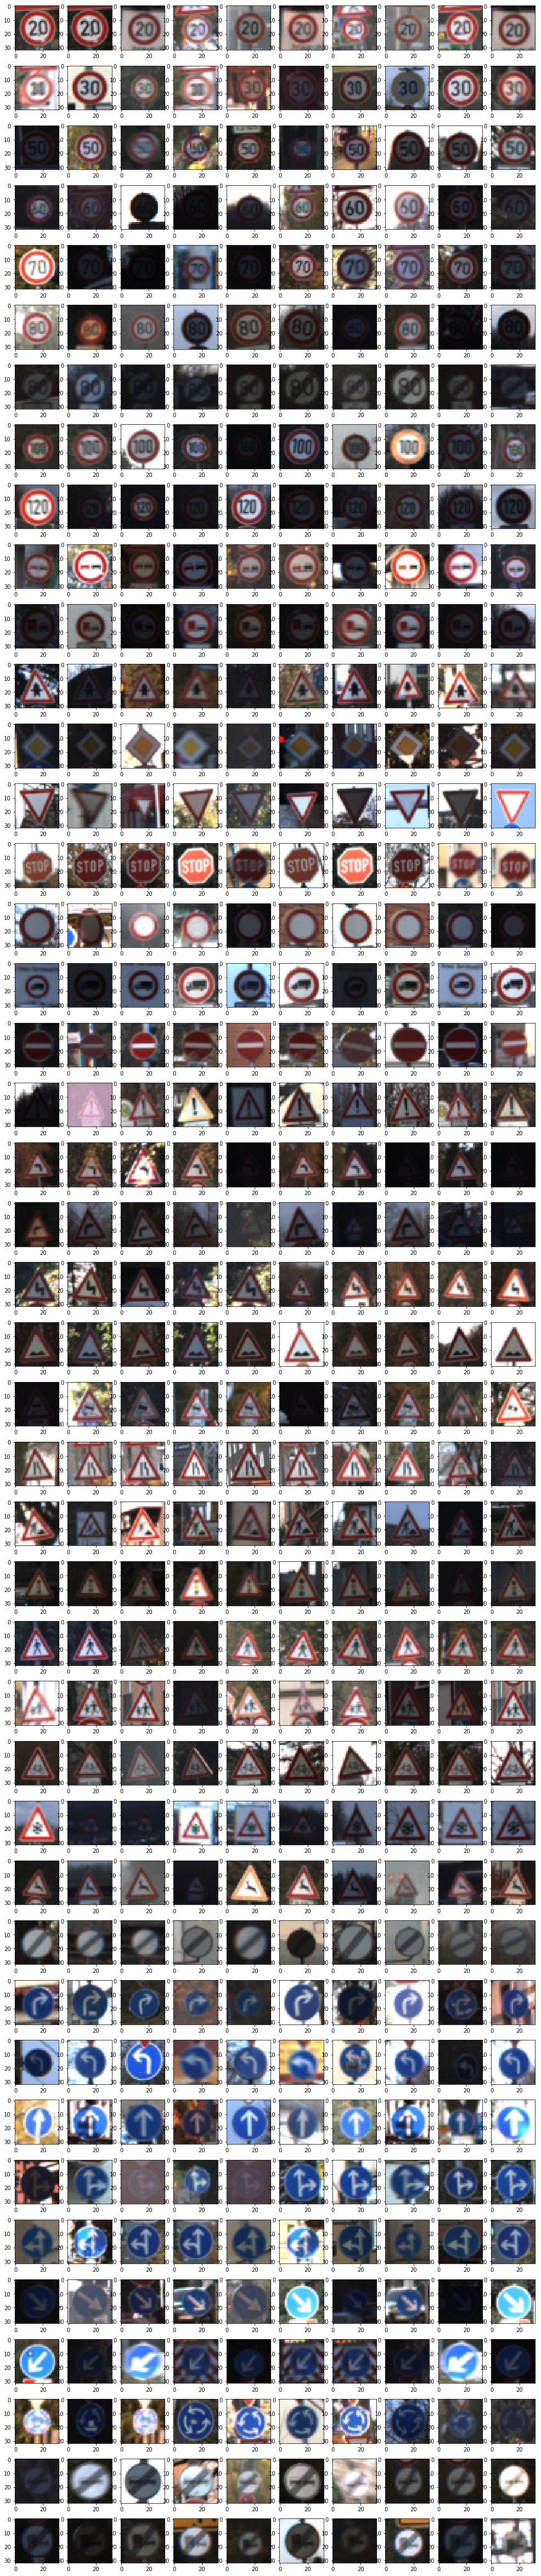

In [9]:
f, axarr = plt.subplots(n_classes, MAX_AMOUNT_OF_SAMPLES)
f.set_figwidth(17)
f.set_figheight(2 * n_classes)

for row, category in enumerate(category_ids):
    for column in range(MAX_AMOUNT_OF_SAMPLES):
        img = samples_dict[category][column]
        axarr[row, column].imshow(img)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#### Improve brightness and contrast

We can use this opencv's function `cv2.convertScaleAbs(image, alpha, beta)` to improve brightness and contrast. It basically modifies every pixel by doing `pixel * alpha + beta`. More info [here](https://docs.opencv.org/3.4/d3/dc1/tutorial_basic_linear_transform.html)
The main challange here is that some images have a great contrast/brightness and modifying them makes results worse, so I procedeed to make a function that returns the value of alpha/beta based on an input X. What's that X? well, I noticed that the average between every pixel's value of a dark image is lower than the one for a brighter image, so that's the value I'll use as input for my `get_alpha` and `get_beta` functions.
Then, I just had to set the limits and the restrictions to make the results lower when the input was higher.

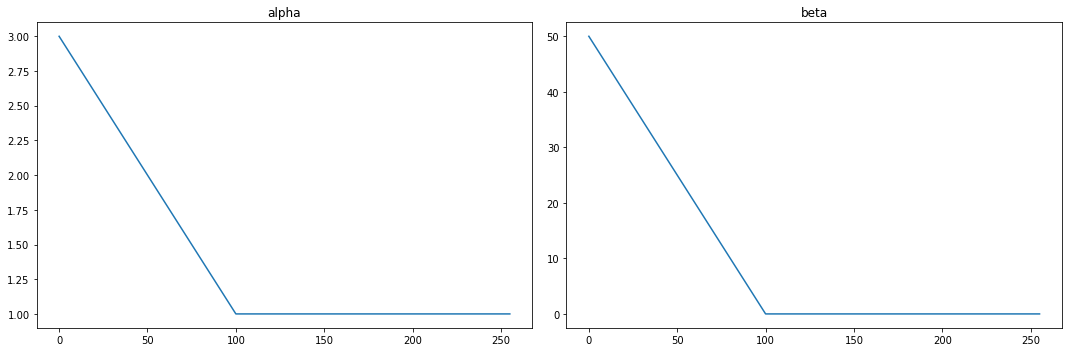

In [10]:
x_list = np.arange(0, 256)

def get_param(x, y_min, y_max, limit_x=100):
    if x > limit_x:
        return y_min
    normalized_x = x / 255
    b = y_max
    m = (y_min - y_max) / limit_x
    return m*x + b

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

alpha_list = [get_param(x, y_min=1, y_max=3) for x in x_list]
axes[0].plot(x_list, alpha_list)
axes[0].title.set_text('alpha')

beta_list = [get_param(x, y_min=0, y_max=50) for x in x_list]
axes[1].plot(x_list, beta_list)
axes[1].title.set_text('beta')

fig.tight_layout()

There are some images that have a white background but the traffic sign still looks completely black. In those cases the mean of the image doesn't overpass the threshold.. that's why we remove the padding first, because all images are quite centered

In [11]:
import cv2

def remove_padding(image, padding_percentage=40):
    [height, width, _] = image.shape
    new_height = height - height * padding_percentage / 100
    new_width = width - width * padding_percentage / 100
    
    vertical_padding = int((height - new_height) / 2)
    horizontal_padding = int((width - new_width) / 2)
    
    return image[vertical_padding:height-vertical_padding, horizontal_padding:width-horizontal_padding]

def improve_contrast_and_brightness(image):
    crop_img = remove_padding(image)
    values_mean = np.mean(crop_img)
    alpha = get_param(values_mean, y_min=1, y_max=3)
    beta = get_param(values_mean, y_min=0, y_max=50)
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

Mean:  23.1516927083


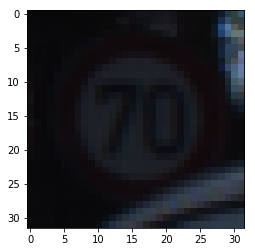

In [12]:
img = X_train[11]
plt.imshow(img)
print('Mean: ', np.mean(img))

Mean:  157.488606771


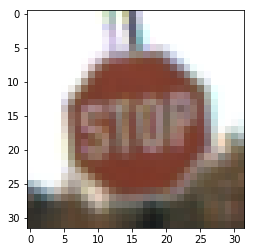

In [13]:
img = X_train[2]
plt.imshow(img)
print('Mean: ', np.mean(img))

Mean:  107.027018229


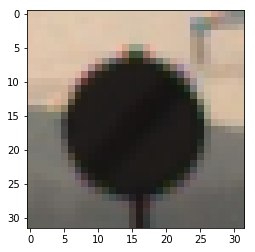

In [14]:
plt.imshow(samples_dict[32][5])
print('Mean: ', np.mean(samples_dict[32][5]))

Mean:  52.1233333333


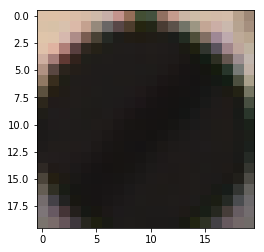

In [15]:
crop_img = remove_padding(samples_dict[32][5])
plt.imshow(crop_img)
print('Mean: ', np.mean(crop_img))

In [16]:
def show_rows_comparison(function):
    f, axarr = plt.subplots(n_classes * 2, MAX_AMOUNT_OF_SAMPLES)
    f.set_figwidth(17)
    f.set_figheight(4 * n_classes)
    
    duplicated_category_ids = []
    for categoty_id in category_ids:
        duplicated_category_ids.append(categoty_id)
        duplicated_category_ids.append(categoty_id)

    for row, category in enumerate(duplicated_category_ids):
        for column in range(MAX_AMOUNT_OF_SAMPLES):
            img = samples_dict[category][column]
            if row % 2 == 1:
                img = function(img)
            axarr[row, column].imshow(img)

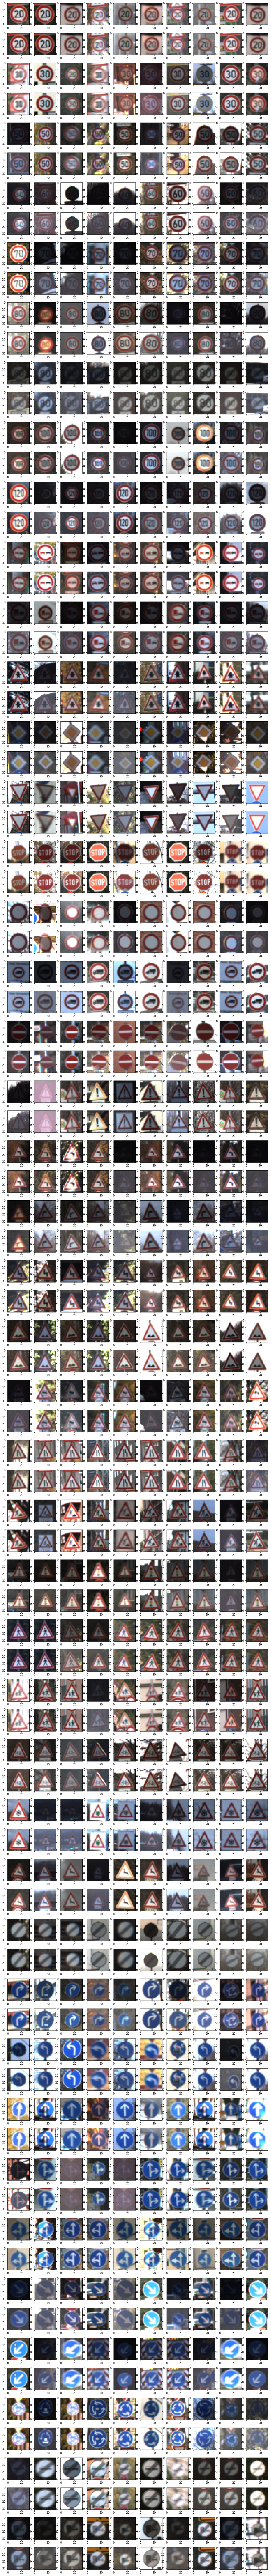

In [17]:
show_rows_comparison(improve_contrast_and_brightness)

Apply improve_contrast_and_brightness to datasets

In [18]:
X_train = np.array([improve_contrast_and_brightness(img) for img in X_train])

In [19]:
X_valid = np.array([improve_contrast_and_brightness(img) for img in X_valid])

In [20]:
X_test = np.array([improve_contrast_and_brightness(img) for img in X_test])

#### Convert to grayscale

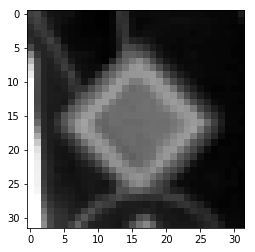

In [21]:
gray_img = cv2.cvtColor(X_train[0], cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img, cmap='gray')

In [22]:
a, b, c, _ = X_train.shape
new_shape = (a, b, c, 1)
X_train = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in X_train]).reshape(new_shape)

In [23]:
a, b, c, _ = X_valid.shape
new_shape = (a, b, c, 1)
X_valid = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in X_valid]).reshape(new_shape)

In [24]:
a, b, c, _ = X_test.shape
new_shape = (a, b, c, 1)
X_test = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in X_test]).reshape(new_shape)

#### Data augmentation - Rotate a little the image

(32, 32, 1)


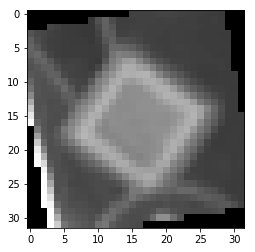

In [25]:
from scipy import ndimage

img = ndimage.rotate(X_train[0], 10, reshape=False)
print(img.shape)
plt.imshow(img.reshape((32,32)), cmap='gray')

In [26]:
X_train.shape

(34799, 32, 32, 1)

In [27]:
rotated_1 = np.array([ndimage.rotate(img, 10, reshape=False) for img in X_train])
rotated_2 = np.array([ndimage.rotate(img, -10, reshape=False) for img in X_train])

rotated = np.append(rotated_1, rotated_2, axis=0)
y_train_copy = np.append(y_train, y_train)


X_train = np.append(X_train, rotated, axis=0)
y_train = np.append(y_train, y_train_copy, axis=0)

X_train.shape

(104397, 32, 32, 1)

#### Data augmentation - Remove parts of the image

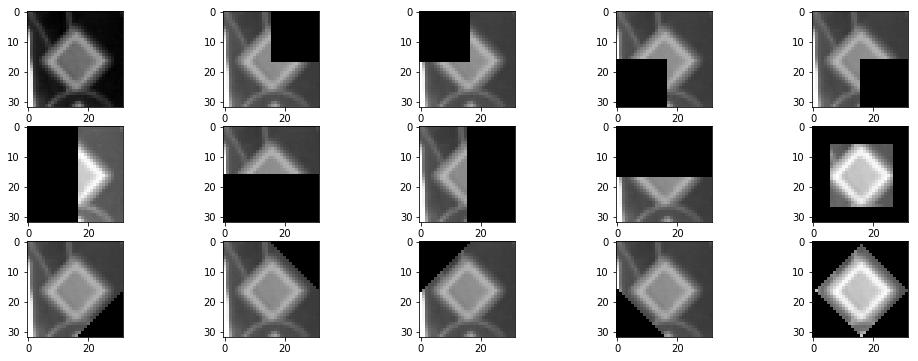

In [28]:
img = X_train[0].reshape((32, 32))

height, width = img.shape
h_half = int(height / 2)
w_half = int(width / 2)

TOP_RIGHT = np.array([[w_half, 0], [w_half, h_half], [width, h_half], [width, 0]])
TOP_LEFT = np.array([[0, 0], [0, h_half], [w_half, h_half], [w_half, 0]])
BOTTOM_LEFT = np.array([[0, height], [w_half, height], [w_half, h_half], [0, h_half]])
BOTTOM_RIGHT = np.array([[w_half, h_half], [w_half, height], [width, height], [width, h_half]])

LEFT_HALF = np.array([[0, 0], [0, height], [w_half, height], [w_half, 0]])
BOTTOM_HALF = np.array([[0, h_half], [0, height], [width, height], [width, h_half]])
RIGHT_HALF = np.array([[w_half, 0], [w_half, height], [width, height], [width, 0]])
TOP_HALF = np.array([[0, 0], [0, h_half], [width, h_half], [width, 0]])

TOP_RIGHT_TRIANGLE = np.array([[w_half, 0], [width, h_half], [width, 0]])
TOP_LEFT_TRIANGLE = np.array([[0, 0], [0, h_half], [w_half, 0]])
BOTTOM_LEFT_TRIANGLE = np.array([[0, height], [w_half, height], [0, h_half]])
BOTTOM_RIGHT_TRIANGLE = np.array([[w_half, height], [width, height], [width, h_half]])

def remove_section(image, polygon_points):
    result = np.copy(image)
    cv2.fillConvexPoly(result, polygon_points, 0)
    return result

def remove_four_corners_triangle(image):
    result = remove_section(image, TOP_RIGHT_TRIANGLE)
    result = remove_section(result, TOP_LEFT_TRIANGLE)
    result = remove_section(result, BOTTOM_LEFT_TRIANGLE)
    result = remove_section(result, BOTTOM_RIGHT_TRIANGLE)
    return result

def set_padding_black(image, thickness_percentage=16):
    padding = int(height * thickness_percentage / 100)

    LEFT = np.array([[0, 0], [0, height], [padding, height], [padding, 0]])
    BOTTOM = np.array([[0, height - padding], [0, height], [width, height], [width, height - padding]])
    RIGHT = np.array([[width - padding, 0], [width - padding, height], [width, height], [width, 0]])
    TOP = np.array([[0, 0], [0, padding], [width, padding], [width, 0]])
    
    result = remove_section(image, LEFT)
    result = remove_section(result, BOTTOM)
    result = remove_section(result, RIGHT)
    result = remove_section(result, TOP)
    
    return result

f, axarr = plt.subplots(3, 5)
f.set_figwidth(17)
f.set_figheight(6)

axarr[0, 0].imshow(img, cmap='gray')
axarr[0, 1].imshow(remove_section(img, TOP_RIGHT), cmap='gray')
axarr[0, 2].imshow(remove_section(img, TOP_LEFT), cmap='gray')
axarr[0, 3].imshow(remove_section(img, BOTTOM_LEFT), cmap='gray')
axarr[0, 4].imshow(remove_section(img, BOTTOM_RIGHT), cmap='gray')

axarr[1, 0].imshow(remove_section(img, LEFT_HALF), cmap='gray')
axarr[1, 1].imshow(remove_section(img, BOTTOM_HALF), cmap='gray')
axarr[1, 2].imshow(remove_section(img, RIGHT_HALF), cmap='gray')
axarr[1, 3].imshow(remove_section(img, TOP_HALF), cmap='gray')
axarr[1, 4].imshow(set_padding_black(img), cmap='gray')

axarr[2, 0].imshow(remove_section(img, BOTTOM_RIGHT_TRIANGLE), cmap='gray')
axarr[2, 1].imshow(remove_section(img, TOP_RIGHT_TRIANGLE), cmap='gray')
axarr[2, 2].imshow(remove_section(img, TOP_LEFT_TRIANGLE), cmap='gray')
axarr[2, 3].imshow(remove_section(img, BOTTOM_LEFT_TRIANGLE), cmap='gray')
axarr[2, 4].imshow(remove_four_corners_triangle(img), cmap='gray')

In [29]:
top_right = np.array([remove_section(img, TOP_RIGHT) for img in X_train])
top_left = np.array([remove_section(img, TOP_LEFT) for img in X_train])
bottom_left = np.array([remove_section(img, BOTTOM_LEFT) for img in X_train])
bottom_right = np.array([remove_section(img, BOTTOM_RIGHT) for img in X_train])
# left_half = np.array([remove_section(img, LEFT_HALF) for img in X_train])
# bottom_half = np.array([remove_section(img, BOTTOM_HALF) for img in X_train])
# right_half = np.array([remove_section(img, RIGHT_HALF) for img in X_train])
# top_half = np.array([remove_section(img, TOP_HALF) for img in X_train])
# no_padding = np.array([remove_padding(img) for img in X_train])
# bottom_right_triangle = np.array([remove_section(img, BOTTOM_RIGHT_TRIANGLE) for img in X_train])
# top_right_triangle = np.array([remove_section(img, TOP_RIGHT_TRIANGLE) for img in X_train])
# top_left_triangle = np.array([remove_section(img, TOP_LEFT_TRIANGLE) for img in X_train])
# bottom_left_triangle = np.array([remove_section(img, BOTTOM_LEFT_TRIANGLE) for img in X_train])
# no_corners_triangle = np.array([remove_four_corners_triangle(img) for img in X_train])


acc = np.append(top_right, top_left, axis=0)
y_train_acc = np.append(y_train, y_train, axis=0)
acc = np.append(acc, bottom_left, axis=0)
y_train_acc = np.append(y_train_acc, y_train, axis=0)
acc = np.append(acc, bottom_right, axis=0)
y_train_acc = np.append(y_train_acc, y_train, axis=0)
# acc = np.append(acc, left_half, axis=0)
# y_train_acc = np.append(y_train_acc, y_train, axis=0)
# acc = np.append(acc, bottom_half, axis=0)
# y_train_acc = np.append(y_train_acc, y_train, axis=0)
# acc = np.append(acc, right_half, axis=0)
# y_train_acc = np.append(y_train_acc, y_train, axis=0)
# acc = np.append(acc, top_half, axis=0)
# y_train_acc = np.append(y_train_acc, y_train, axis=0)
# acc = np.append(acc, no_padding, axis=0)
# y_train_acc = np.append(y_train_acc, y_train, axis=0)
# acc = np.append(acc, bottom_right_triangle, axis=0)
# y_train_acc = np.append(y_train_acc, y_train, axis=0)
# acc = np.append(acc, top_right_triangle, axis=0)
# y_train_acc = np.append(y_train_acc, y_train, axis=0)
# acc = np.append(acc, top_left_triangle, axis=0)
# y_train_acc = np.append(y_train_acc, y_train, axis=0)
# acc = np.append(acc, bottom_left_triangle, axis=0)
# y_train_acc = np.append(y_train_acc, y_train, axis=0)
# acc = np.append(acc, no_corners_triangle, axis=0)
# y_train_acc = np.append(y_train_acc, y_train, axis=0)

X_train = np.append(X_train, acc, axis=0)
y_train = np.append(y_train, y_train_acc, axis=0)

X_train.shape

(521985, 32, 32, 1)

I couldn't apply all the data augmentation because I ran out of memory. I should improve the way to deal with this. For now I just commented out most of them to avoid that issue.

#### Normalization

In [30]:
X_train[0].dtype

dtype('uint8')

In [31]:
def normalize(tensor):
    return (tensor.astype(np.int16) - 128) / 128

def denormalize(tensor):
    return (tensor * 128) + 128

random_image = X_train[0]
print('random_image.shape: ', random_image.shape)
print('np.max(random_image): ', np.max(random_image))
print('np.min(random_image): ', np.min(random_image))

print('normalize(random_image).shape: ', normalize(random_image).shape)
print('np.max(normalize(random_image)): ', np.max(normalize(random_image)))
print('np.min(normalize(random_image)): ', np.min(normalize(random_image)))

assert (denormalize(normalize(random_image)) == random_image).all()

random_image.shape:  (32, 32, 1)
np.max(random_image):  255
np.min(random_image):  56
normalize(random_image).shape:  (32, 32, 1)
np.max(normalize(random_image)):  0.9921875
np.min(normalize(random_image)):  -0.5625


In [32]:
X_train = normalize(X_train)

In [33]:
X_valid = normalize(X_valid)

In [34]:
X_test = normalize(X_test)

In [35]:
X_train, y_train = shuffle(X_train, y_train, random_state=20)

### Model Architecture

In [36]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

FILTER_DEPTH = 32

def LeNet(x, dropout):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28xFILTER_DEPTH.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, FILTER_DEPTH), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(FILTER_DEPTH))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28xFILTER_DEPTH. Output = 14x14xFILTER_DEPTH.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, FILTER_DEPTH, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Dropout
    fc0 = tf.nn.dropout(fc0, dropout)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Dropout
    fc1 = tf.nn.dropout(fc1, dropout)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, dropout)

    # Layer 5: Fully Connected. Input = 84. Output = n_classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### Features and Labels

`x` is a placeholder for a batch of input images. `y` is a placeholder for a batch of output labels.

In [37]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

#### Training Pipeline

In [38]:
LEARNING_RATE = 0.001
DROPOUT = 0.75

keep_prob = tf.placeholder(tf.float32)
logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
training_operation = optimizer.minimize(loss_operation)

#### Model Evaluation

In [39]:
EPOCHS = 10
BATCH_SIZE = 128

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset + BATCH_SIZE], y_data[offset:offset + BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#### Train the model

# SKIP THIS STEP IF YOU DO NOT WANT TO TRAIN

In [40]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...\n")
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: DROPOUT})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.952

EPOCH 2 ...
Validation Accuracy = 0.965

EPOCH 3 ...
Validation Accuracy = 0.969

EPOCH 4 ...
Validation Accuracy = 0.973

EPOCH 5 ...
Validation Accuracy = 0.970

EPOCH 6 ...
Validation Accuracy = 0.975

EPOCH 7 ...
Validation Accuracy = 0.970

EPOCH 8 ...
Validation Accuracy = 0.977

EPOCH 9 ...
Validation Accuracy = 0.973

EPOCH 10 ...
Validation Accuracy = 0.977

Model saved


I got `Validation Accuracy = 0.684` with a normalization only

I got `Validation Accuracy = 0.717` above + improving brightness and contrast

I got `Validation Accuracy = 0.755` above + convert to grayscale

I got `Validation Accuracy = 0.951` above + data augmentation (rotation +/- 10 degress + tr,tl,br,bl)

I got `Validation Accuracy = 0.968` above + dropout

I got `Validation Accuracy = 0.977` above + increase filter depth to 32

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load model

In [41]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.964


### Load and Output the Images

I got some images I found on internet.

Most of the real photos were taken from this video: https://www.youtube.com/watch?v=TGzL1Z3INnw

The fake images were taken from: https://en.wikipedia.org/wiki/Road_signs_in_Germany

In [42]:
import matplotlib.image as mpimg
import os

X_mydata = []
y_mydata = []

filenameList = os.listdir('./my-dataset')
for filename in filenameList:
    expected_y = filename.split('-')[0]
    y_mydata.append(int(expected_y))
    
    input_img = mpimg.imread('./my-dataset/' + filename)
    # If float32, the values are between 0 and 1 and it breaks future logic
    if (input_img.dtype == np.float32):
        input_img = (input_img * 255).astype(np.uint8)
    
    # If it has 4 channels (because of png), convert to RGB (3 channels)
    if (input_img.shape[2] == 4):
        input_img = cv2.cvtColor(input_img, cv2.COLOR_RGBA2RGB)

    input_img = cv2.resize(input_img, (32,32))
    X_mydata.append(input_img)

X_mydata = np.array(X_mydata)
print('X_mydata.shape: ', X_mydata.shape)
print('len(y_mydata): ', len(y_mydata))

X_mydata.shape:  (104, 32, 32, 3)
len(y_mydata):  104


In [43]:
from textwrap import wrap

N_COLUMNS = 5

def show_images_with_labels(images, labels):
    n_rows = int(len(images) / N_COLUMNS)+1
    fig, axs = plt.subplots(n_rows,N_COLUMNS, figsize=(17, n_rows * 3))
    fig.subplots_adjust(hspace = .2, wspace=.1)
    axs = axs.ravel()
        
    for i in range(N_COLUMNS * n_rows):
        axs[i].axis('off')
        if (i < len(images)):
            image = images[i]
            if (image.shape[2] == 1):
                image = image.reshape((32, 32))
            axs[i].imshow(image, cmap='gray')
            label_id = labels[i]
            label_text = sign_names_dict[str(label_id)]
            axs[i].set_title('{} ({})'.format('\n'.join(wrap(label_text, 30)), label_id))

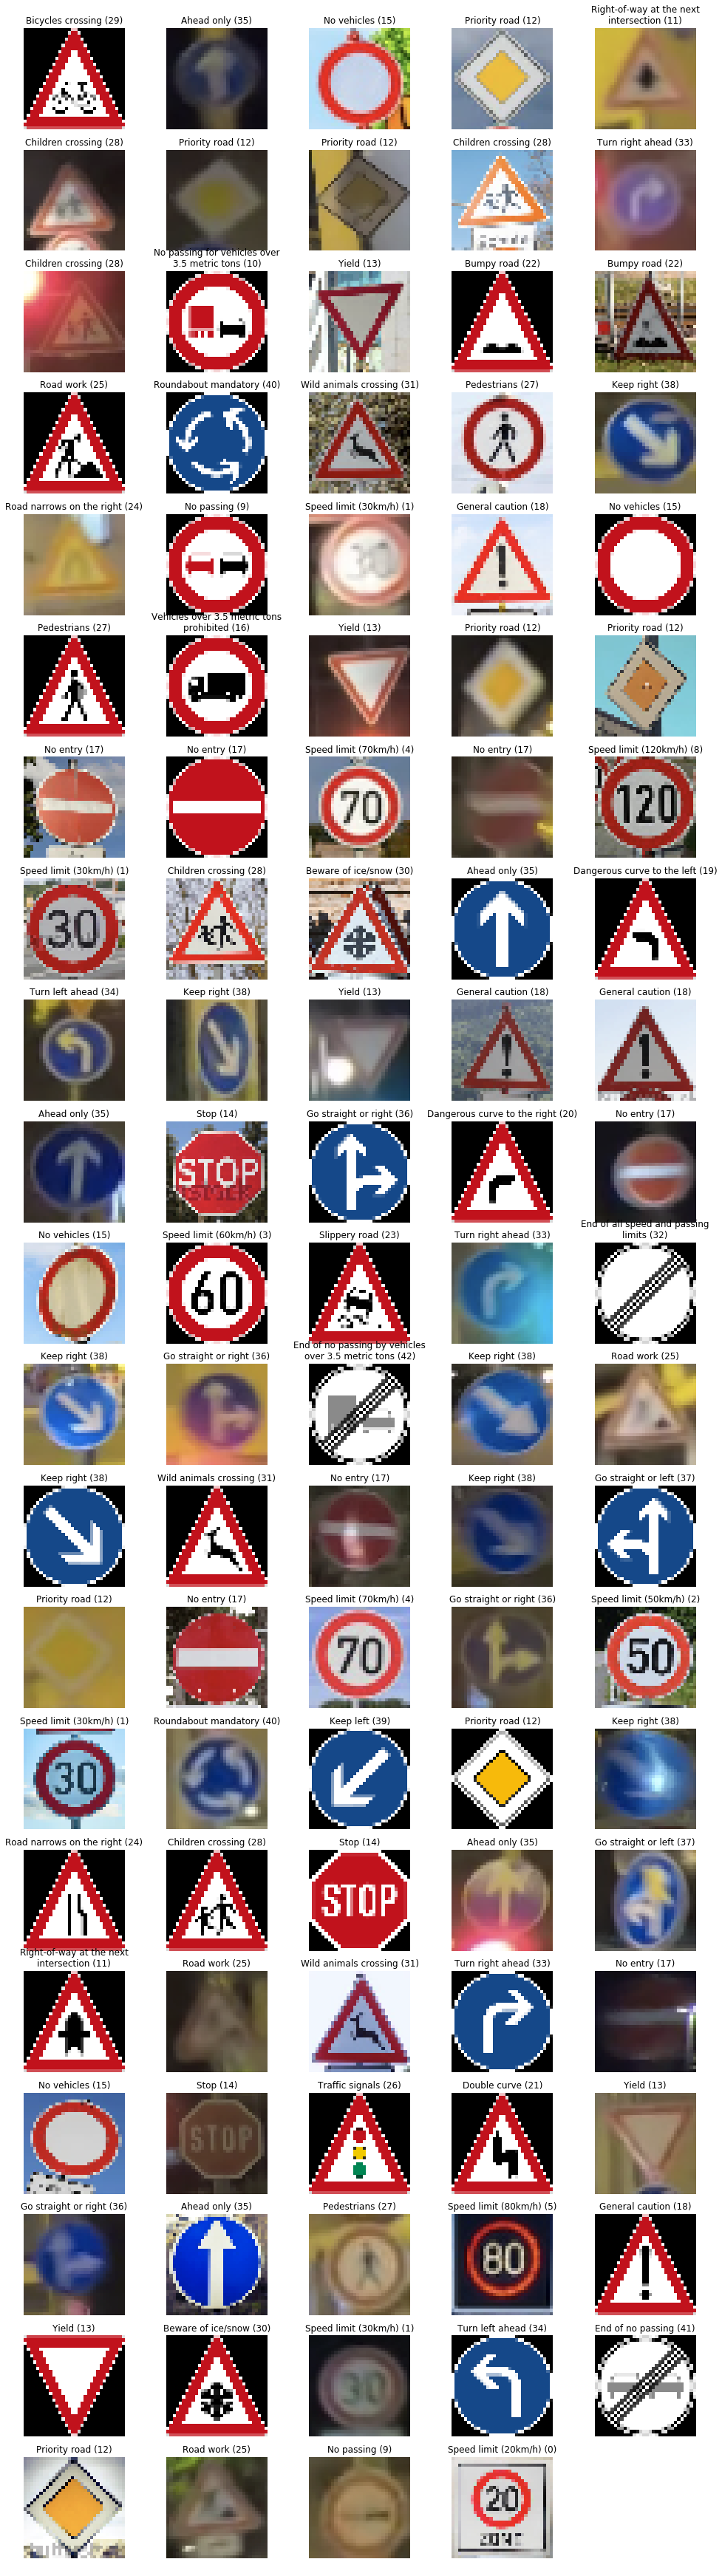

In [44]:
show_images_with_labels(X_mydata, y_mydata)

### Predict the Sign Type for Each Image

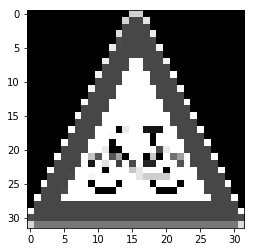

In [45]:
def pipeline(image):
    result = improve_contrast_and_brightness(image)
    result = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
    return normalize(result)

a = np.copy(X_mydata[0])
a = pipeline(a)
plt.imshow(a, cmap='gray')

In [46]:
preprocessed_X_mydata = np.array([pipeline(img).reshape(32,32,1) for img in X_mydata])
y_mydata = np.array(y_mydata)

In [47]:
preprocessed_X_mydata.shape

(104, 32, 32, 1)

INFO:tensorflow:Restoring parameters from ./lenet


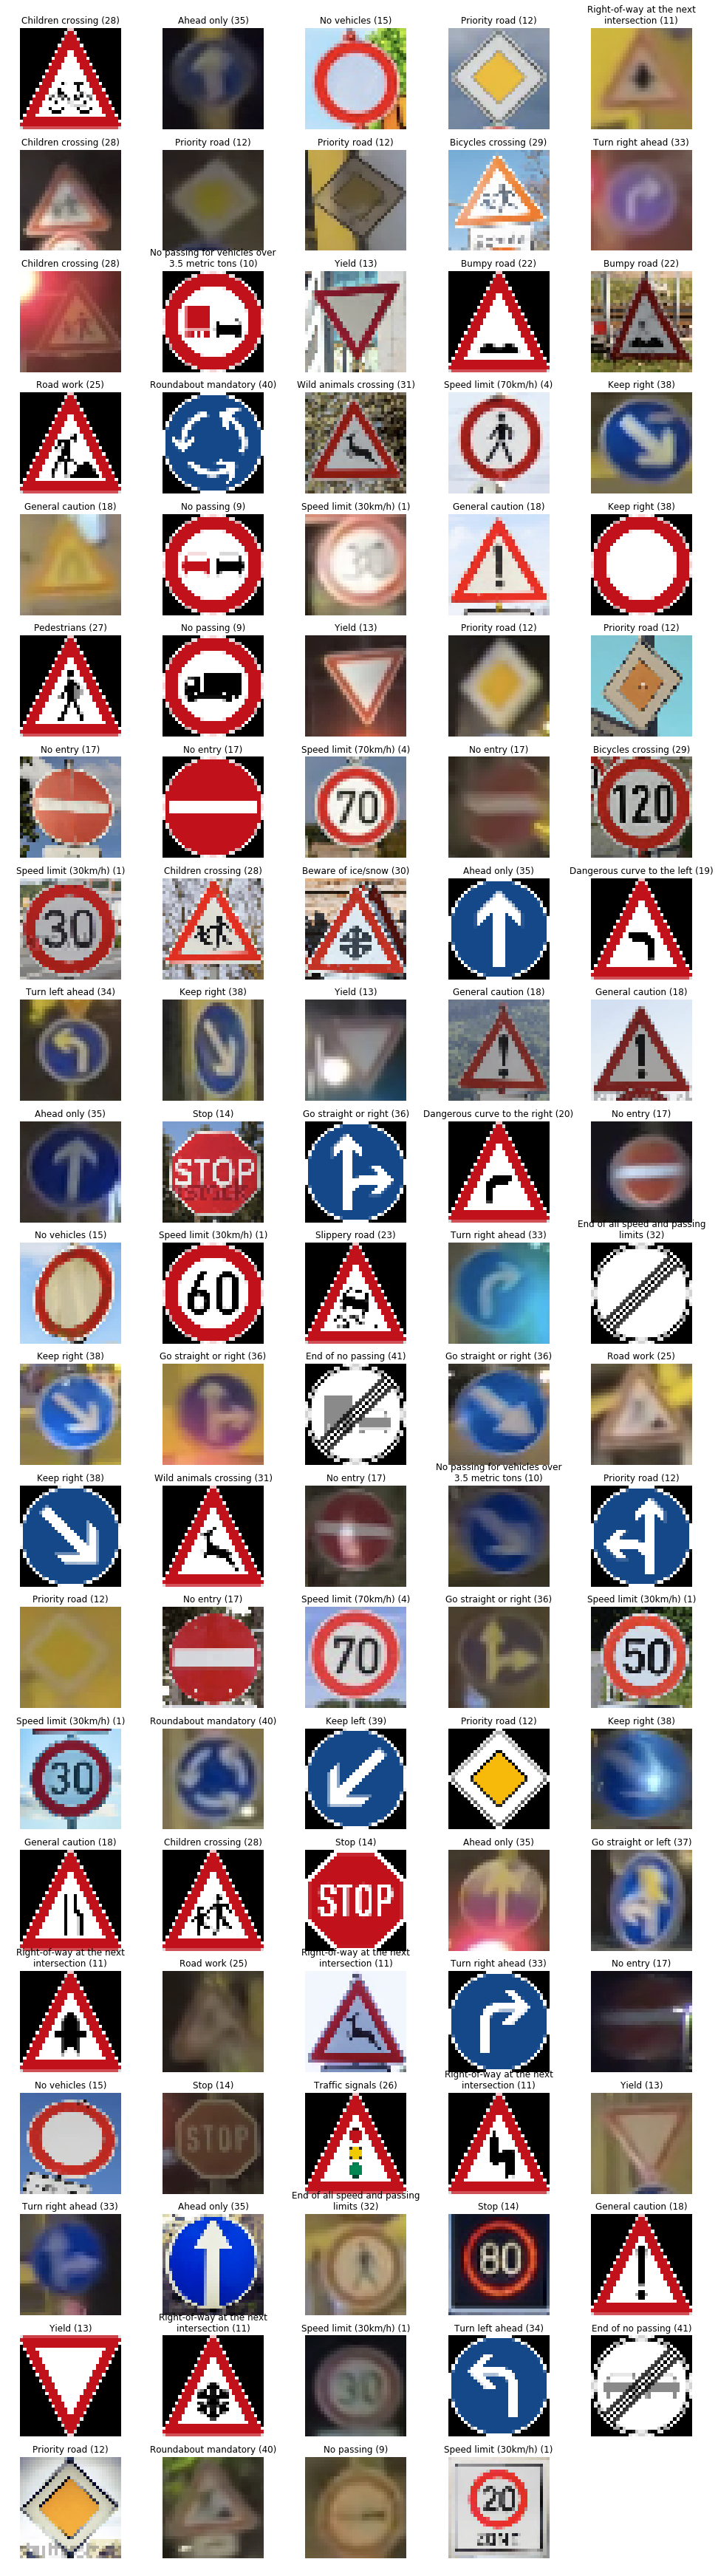

In [48]:
prediction = tf.argmax(logits, 1)

with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    predictions = sess.run(prediction, feed_dict={x: preprocessed_X_mydata, keep_prob: 1 })
    
    show_images_with_labels(X_mydata, predictions)

### Analyze Performance

In [49]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    acc = evaluate(preprocessed_X_mydata, y_mydata)
    
    print("Accuracy = {:.3f}".format(acc))

INFO:tensorflow:Restoring parameters from ./lenet
Accuracy = 0.788


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./lenet


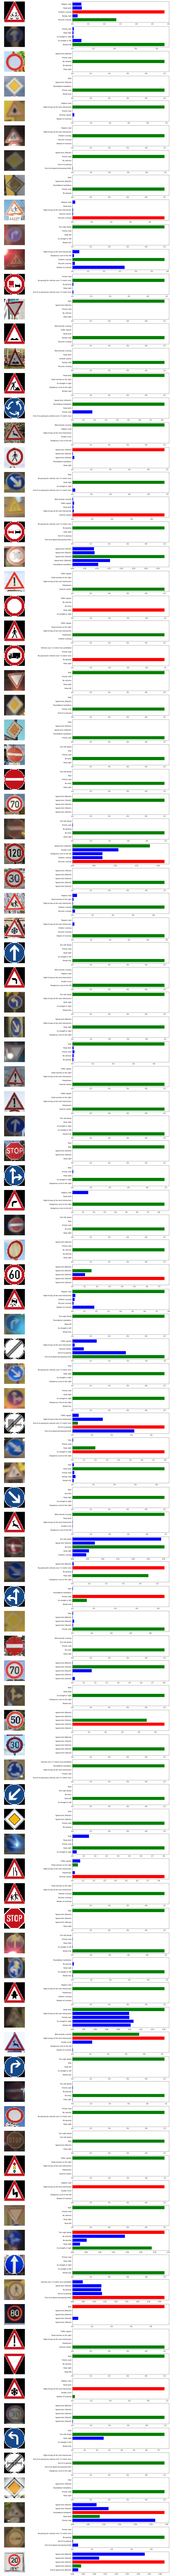

In [50]:
def visualize_top_k(images, top_k):
    probabilities = top_k.values
    indices = top_k.indices
          
    n_rows = len(indices)
    f, axarr = plt.subplots(n_rows, 2, figsize=(24, n_rows * 3))
    f.subplots_adjust(hspace = .2, wspace=.1)
    axarr = axarr.ravel()
    i = 0
    for row in range(n_rows):
        axarr[i].axis('off')
        axarr[i].imshow(images[row])
        i += 1
        max_prob = np.max(probabilities[row])
        colors = ['blue'] * len(indices[row])
        for j, (index, prob) in enumerate(zip(indices[row], probabilities[row])):
            is_correct = sign_names_dict[str(y_mydata[row])] == sign_names_dict[str(index)]
            if (prob == max_prob and not is_correct):
                colors[j] = 'red'
            if (is_correct):
                colors[j] = 'green'
                
        labels = [sign_names_dict[str(j)] for j in indices[row]]
        axarr[i].barh(labels, probabilities[row], color=colors)
        i += 1

with tf.Session() as sess:
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, './lenet')
    softmax_logits = tf.nn.softmax(logits)
    top_5 = sess.run(tf.nn.top_k(softmax_logits, k=5), feed_dict={ x: preprocessed_X_mydata, keep_prob: 1 })
    visualize_top_k(X_mydata, top_5)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")